In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("datasets/mnsit.csv")
df.head(2)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
x = df.drop('label',axis=1)
y = df["label"]
print(x.shape)
print(y.shape)

(42000, 784)
(42000,)


## PCA FOR 2D Visualization

In [4]:
labels = y.head(15000)
data = x.head(15000)

In [5]:
# standardize data
from sklearn.preprocessing import StandardScaler
standard_data = StandardScaler().fit_transform(data)
print(standard_data.shape)

(15000, 784)


In [6]:
sample_data = standard_data

##### Calculate Covariance Matrix : S = X^T * X

In [7]:
# find Covariance Matrix : S = X^T * X
covar_matrix = np.matmul(sample_data.T,sample_data)
print(covar_matrix.shape)

(784, 784)


##### Calculate Eigen Values and Vectors

In [8]:
# linalg -> linear algebra
from scipy.linalg import eigh

# eigh() -> return eigen values in ascending order
# we need highest 2 -> (782,783)
values , vectors = eigh(covar_matrix,eigvals=(782,783))
print(vectors.shape)

#reshape for further use
vectors = vectors.T
print(vectors.shape)

(784, 2)
(2, 784)


In [9]:
new_cordinates = np.matmul(vectors,sample_data.T)
print(vectors.shape , " x " , sample_data.T.shape )
print(new_cordinates.shape)

(2, 784)  x  (784, 15000)
(2, 15000)


In [10]:
new_cordinates_stacked = np.vstack((new_cordinates,labels)).T
print(new_cordinates.shape)

dataframe = pd.DataFrame(data = new_cordinates_stacked,columns=("1st_Principal","2nd_Principal","label"))
dataframe.head(5)

(2, 15000)


,1st_Principal,2nd_Principal,label
0,-5.558661,-5.043558,1.0
1,6.193635,19.305278,0.0
2,-1.909878,-7.678775,1.0
3,5.525748,-0.464845,4.0
4,6.366527,26.644289,0.0


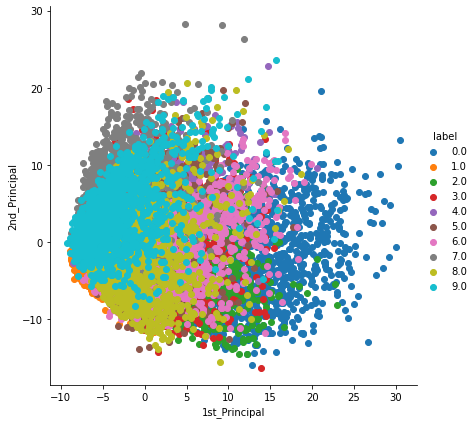

In [18]:
sns.FacetGrid(dataframe,hue='label',height=6).map(plt.scatter,"1st_Principal","2nd_Principal").add_legend()

## PCA using Scikit Learn

In [12]:
from sklearn.decomposition import PCA
pca = PCA()

In [13]:
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)

print(pca_data.shape)

(15000, 2)


(2, 15000)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


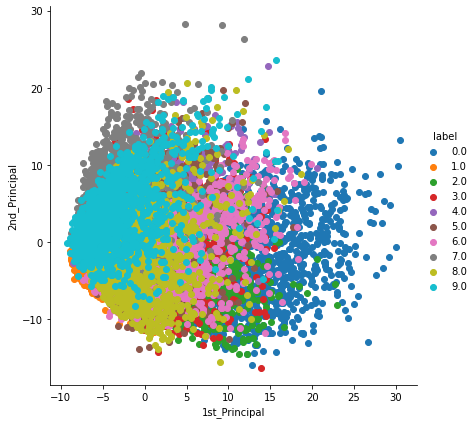

In [14]:
new_cordinates_stacked = np.vstack((pca_data.T,labels)).T
print(new_cordinates.shape)

dataframe = pd.DataFrame(data = new_cordinates_stacked,columns=("1st_Principal","2nd_Principal","label"))
dataframe.head(5)

sns.FacetGrid(dataframe,hue='label',size=6).map(plt.scatter,"1st_Principal","2nd_Principal").add_legend()

## PCA for Dimensionality Reduction

Text(0, 0.5, 'Explained Variance (%) ')

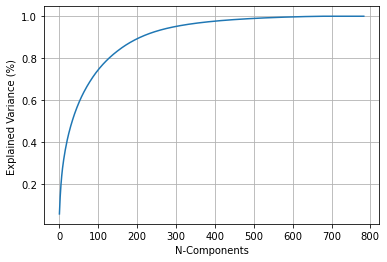

In [15]:
pca1 = PCA()
pca1.n_dimensions = 783
pca1_data = pca1.fit_transform(sample_data)

percent_var_explained = pca1.explained_variance_ / np.sum(pca1.explained_variance_)
cumulative_var = np.cumsum(percent_var_explained) 


plt.plot(cumulative_var)
plt.grid()
plt.xlabel("N-Components")
plt.ylabel("Explained Variance (%) ")

In [16]:
pca2 = PCA()
pca2.n_components = 200
pca2_data = pca2.fit_transform(sample_data)

print(sample_data.shape)
print(pca2_data.shape)

(15000, 784)
(15000, 200)


In [17]:
print(sample_data.shape)
print(pca2_data.shape)

(15000, 784)
(15000, 200)


### PCA 2d visualization for Breast Cancer Dataset

In [50]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [61]:
cancer_data = load_breast_cancer().data
cancer_data.shape

(569, 30)

In [71]:
# concat data and class
cancer_class =  load_breast_cancer().target
print(cancer_class.shape)
cancer_class = np.reshape(cancer_class,(569,1))
cancer_class.shape

In [76]:
# get labels
labels = load_breast_cancer().feature_names
labels = np.append(labels,'class')
print(labels)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension' 'class']


In [78]:
final_cancer_data  = np.concatenate([cancer_data,cancer_class],axis = 1)
df_cancer = pd.DataFrame(final_cancer_data,columns=labels)

In [80]:
df_cancer.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0


In [83]:
pca_cancer = PCA(n_components = 2)
pca_cancer_data = pca_cancer.fit_transform(df_cancer)
print(df_cancer.shape)
print(pca_cancer_data.shape)

(569, 31)
(569, 2)


In [100]:
pca_cancer_data['class'] = df_cancer['class'].to_numpy()
# df_cancer_pca = pd.DataFrame(data = pca_cancer_data
#              , columns = ['principal component 1', 'principal component 2','class'])

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [86]:
print(df_cancer_pca.shape)
df_cancer_pca.

(569, 2)


,principal component 1,principal component 2
0,1160.142744,-293.917535
1,1269.122597,15.630194
2,995.794082,39.156723
3,-407.180411,-67.380505
4,930.341382,189.340710
